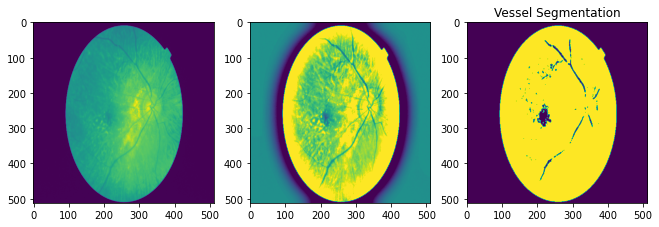

In [35]:
import pylab as pl
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


img = cv.imread('Retina_004.png')


img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img, (512,512))

img_t = cv.addWeighted(img,4, cv.GaussianBlur(img , (0,0),30) ,-4 ,128)

ret,thresh1 = cv.threshold(img_t,127,255,cv.THRESH_OTSU)
f, axarr = plt.subplots(1,3,figsize = (11,11))
axarr[0].imshow(img)
axarr[1].imshow(img_t)
plt.title('After applying Gaussian Blur')

axarr[2].imshow(thresh1)
plt.title('Vessel Segmentation')
plt.show()

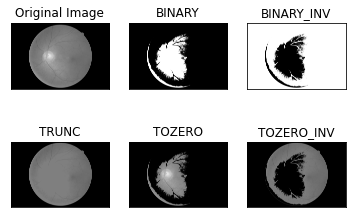

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('cataract_001.png',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

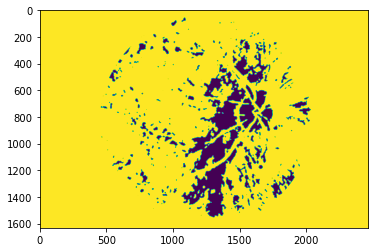

In [31]:
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def adjust_gamma(image, gamma=1.0):
   table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv.LUT(image, table)

def extract_ma(image):
    r,g,b=cv.split(image)
    comp=255-g
    clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    histe=clahe.apply(comp)
    adjustImage = adjust_gamma(histe,gamma=3)
    comp = 255-adjustImage
    J =  adjust_gamma(comp,gamma=4)
    J = 255-J
    J = adjust_gamma(J,gamma=4)

    K=np.ones((11,11),np.float32)
    L = cv.filter2D(J,-1,K)

    ret3,thresh2 = cv.threshold(L,125,255,cv.THRESH_BINARY|cv.THRESH_OTSU)
    plt.imshow(thresh2)
    
    
img = cv.imread("Retina_004.png")
extract_ma(img)
